In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
%matplotlib inline

Install the python markdown [extension](https://github.com/ipython-contrib/IPython-notebook-extensions/wiki/python-markdown).

In [3]:
import IPython
IPython.html.nbextensions.install_nbextension('/Users/mathiom1/Workspace/probability_playground/ext/python-markdown.js')
IPython.html.nbextensions.check_nbextension('python-markdown.js')

True

In [4]:
%%javascript
IPython.load_extensions('python-markdown');

<IPython.core.display.Javascript object>

In [5]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

** Table of Contents **
<div id="toc"></div>

# Monty Hall

## Problem

The original problem description, as it appears on [Marilyn vos Savant's website](http://marilynvossavant.com/game-show-problem/):

> Suppose you’re on a game show, and you’re given the choice of three doors. Behind one door is a car, behind the others, goats. You pick a door, say \#1, and the host, who knows what’s behind the doors, opens another door, say \#3, which has a goat. He says to you, "Do you want to pick door \#2?" Is it to your advantage to switch your choice of doors?

The answer is 'yes'. For more information on the problem, you can see its entry on [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem).

## Simulation

In [4]:
def select_other(excluded_elements, all_elements):
    """
    excluded_elements, all_elements: two sets
    Return one element of (all_elements - excluded_elements) at random
    """
    remaining_elements = all_elements - excluded_elements
    selected_element = np.random.choice(list(remaining_elements), 1)[0]
    return selected_element  

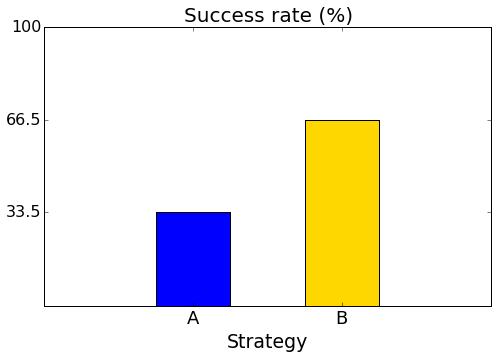

In [5]:
N = 100000 # we repeat the simulation N times

# there are three doors, numbered #1, #2, #3
doors = {1, 2, 3}
# exactly one of them contains the car
door_with_car = np.random.choice(list(doors), N)

# player makes a first guess about the door that contains the car
first_guess = np.random.choice(list(doors), N)

# host opens a door that does not contain the car
# and is different than player's guess
revealed_door = [select_other({first_guess[pos], door_with_car[pos]}, doors) for pos in range(N)]

# player follows one of two strategies:
# either sticks to first guess
second_guess_A = first_guess
# or switches to the remaining door
# (other than first guess and revealed door)
second_guess_B = [select_other({first_guess[pos], revealed_door[pos]}, doors) for pos in range(N)]

# calculate the success rate for each strategy
success_rate_A = sum(second_guess_A == door_with_car) / N
success_rate_B = sum(second_guess_B == door_with_car) / N

fig, ax = plt.subplots(figsize = (8, 5))
ax.set(xlim = (-1, 2), xticks = [0, 1], yticks = [100*success_rate_A, 100*success_rate_B, 100], ylim = (0, 100))
ax.set_title("Success rate (%)", size = 20)
ax.set_xticklabels(["A", "B"], size = 18)
ax.set_xlabel("Strategy", size = 19)
ax.set_yticklabels(["{:.1f}".format(100*success_rate_A), "{:.1f}".format(100*success_rate_B), "100"], size = 16)
_tmp = ax.bar([0], [100*success_rate_A], width = 0.5, align = "center", color = "blue")
_tmp = ax.bar([1], [100*success_rate_B], width = 0.5, align = "center", color = "gold")

# Bertrand's Boxes
From [Wikipedia](https://en.wikipedia.org/wiki/Bertrand%27s_box_paradox):
> There are three boxes, each with one drawer on each of two sides. Each drawer contains a coin. One box has a gold coin on each side (GG), one a silver coin on each side (SS), and the other a gold coin on one side and a silver coin on the other (GS). A box is chosen at random, a random drawer is opened, and a gold coin is found inside it. What is the chance of the coin on the other side being gold?

One might rush to answer '1/2' - but the correct answer is '2/3'.

## Simulation

In [6]:
N = 200000 # we repeat the simulation N times

# there are two kinds of coins involved
GOLD = 1; SILVER = 0

# there are three boxes, each with two drawers
# each drawer contains one coin
box_GG = [GOLD, GOLD]
box_GS = [GOLD, SILVER]
box_SS = [SILVER, SILVER]

boxes = [box_GG, box_GS, box_SS]

def select_drawer(boxes):
    """ randomly select one drawer from one box """
    # select one box at random
    random_choice = np.random.choice(len(boxes))
    chosen_box = boxes[random_choice]
    
    # open one of its two drawers
    opened_drawer, other_drawer = np.random.permutation(chosen_box)
    
    return opened_drawer, other_drawer

# simulate selection of drawer N times
selection = [select_drawer(boxes) for i in range(N)]

opened_drawer = [box[0] for box in selection]
other_drawer  = [box[1] for box in selection]

# mark the cases where we found a gold coin in opened drawer...
found_gold = [coin == GOLD for coin in opened_drawer]
# and among those cases,
# mark the ones where there was a gold coin in the other drawer of the same box
found_gold_also_in_other_drawer = [other_drawer[i] == GOLD for i, f in enumerate(found_gold) if f == True]

# the number of cases we found a gold coin...
num_found_gold = sum(found_gold)
# and among those cases,
# the number of cases there was a gold coin in the other drawer too
num_found_gold_in_other_drawer = sum(found_gold_also_in_other_drawer)

ratio = num_found_gold_in_other_drawer / num_found_gold 

print("Given that we found a Gold coin in the opened drawer,\n"
      "the chances to have a Gold coin in the other drawer, too,\n"
      "are ~{0:.1f}%.".format(100*ratio))


Given that we found a Gold coin in the opened drawer,
the chances to have a Gold coin in the other drawer, too,
are ~66.8%.


# Three Prisoners Problem
From [Wikipedia](https://en.wikipedia.org/wiki/Three_Prisoners_problem):
> Three prisoners, A, B and C, are in separate cells and sentenced to death. The governor has selected one of them at random to be pardoned. The warden knows which one is pardoned, but is not allowed to tell. Prisoner A begs the warden to let him know the identity of one of the others who is going to be executed. "If B is to be pardoned, give me C's name. If C is to be pardoned, give me B's name. And if I'm to be pardoned, flip a coin to decide whether to name B or C."

> The warden tells A that B is to be executed. Prisoner A is pleased because he believes that his probability of surviving has gone up from 1/3 to 1/2, as it is now between him and C. Prisoner A secretly tells C the news, who is also pleased, because he reasons that A still has a chance of 1/3 to be the pardoned one, but his chance has gone up to 2/3. What is the correct answer?

It doesn't look good for A.

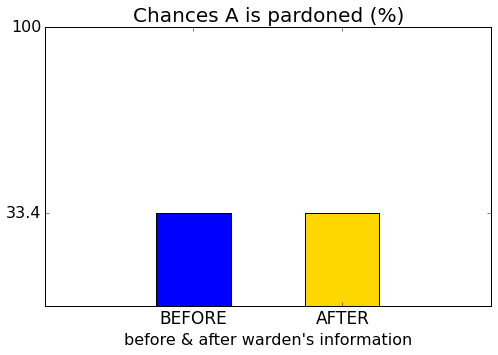

In [7]:
N = 300000 # we repeat the simulation N times

# there are three prisoners
prisoner_A = 0; prisoner_B = 1; prisoner_C = 2

# one of them is pardoned at random
pardoned = np.random.randint(0,3,N)

# we calculate the chances that A is pardoned
# before the warden provides information
a_is_pardoned = [(p == prisoner_A) for p in pardoned]
chances_before = sum(a_is_pardoned) / N

def what_to_say(pardoned_prisoner):
    """
    generate the warden's answer according to
    A's rules
    return the name of a prisoner to be executed
    """
    if pardoned_prisoner == prisoner_A:
        return np.random.choice([prisoner_B, prisoner_C])
    elif pardoned_prisoner == prisoner_B:
        return prisoner_C
    elif pardoned_prisoner == prisoner_C:
        return prisoner_B
    else:
        raise Exception("no such prisoner")

# the warden provides the name of one prisoner
# to be executed (unfortunately)
executed_for_sure = [what_to_say(p) for p in pardoned]

# these are the cases where warden gave B's name...
warden_said_b = [(ex == prisoner_B) for ex in executed_for_sure]
# among those cases, these are the cases that A
# was actually pardoned
warden_said_b_and_a_is_pardoned = [(p == prisoner_A) for i, p in enumerate(pardoned) if warden_said_b[i] == True]

# calculate the chances that A is pardoned
# after the warden's information
chances_after = sum(warden_said_b_and_a_is_pardoned) / sum(warden_said_b)

fig, ax = plt.subplots(figsize = (8, 5))
ax.set(xlim = (-1, 2), xticks = [0, 1], yticks = [100*chances_before, 100], ylim = (0, 100))
ax.set_title("Chances A is pardoned (%)", size = 20)
ax.set_xticklabels(["BEFORE", "AFTER"], size = 17)
ax.set_xlabel("before & after warden's information", size = 16)
ax.set_yticklabels(["{:.1f}".format(100*chances_before), "100"], size = 16)
_tmp = ax.bar([0], [100*chances_before], width = 0.5, align = "center", color = "blue")
_tmp = ax.bar([1], [100*chances_after], width = 0.5, align = "center", color = "gold")

***

In [58]:
%run bertrand_helpers.py

***

# Bertrand's Paradox

Here is the definition of the problem as phrased on [Wikipedia][1]:

 > Consider an equilateral triangle inscribed in a circle. Suppose a chord of the circle is chosen at random. What is the probability that the chord is longer than a side of the triangle?

[1]: https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)

The question is easy to visualize and might appear well-posed at first. For example, in the figure below, the green chord is longer that the side of the inscribed equilateral triangle, while the blue one is shorter. If one were to draw chords at random, what fraction of them would end up being longer than the side of the triangle?

In [7]:
R = 1 # radius of circle

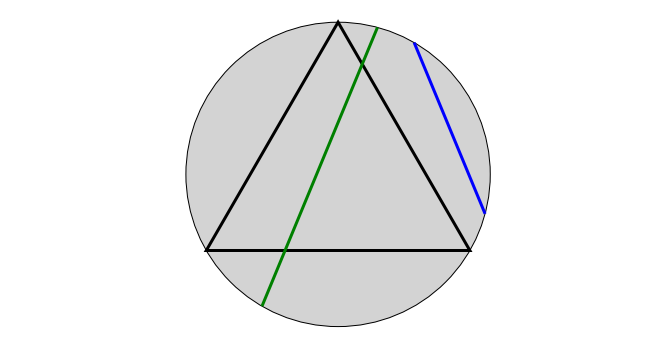

In [33]:
# example plot
fig = plt.figure(figsize=(12,6)); ax = fig.add_subplot(1,1,1)
ax.set(xlim = (-2*R, 2*R), ylim = (-R - 0.1, R + 0.1), aspect = 1)
_tmp = ax.axis('off')

# circle
_tmp = ax.add_patch(patches.Circle((0,0), radius = R, fc = 'lightgrey', lw = 1))

# equilateral triangle inscribed to circle 
_tmp = ax.add_patch(patches.RegularPolygon((0,0), 3, R, lw = 3, fill = False))

# add two chords, one shorter & one longer than triangle's side
_tmp = add_chord(ax, R, np.pi/3, -np.pi/12, "blue", 3)
_tmp = add_chord(ax, R, 5*np.pi/12, -2*np.pi/3, "green", 3)

Let us stress here that the circle is considered fixed and known -- i.e. it is the chords that are drawn at random, not the circle.
Without loss of generality, we consider the circle with center $c = (0,0)$ and radius R = {{R}}).

The problem might appear to be one of tedious calculation until one realizes that the answer might depend on *how exactly* a chord is chosen 'at random'. The 'paradox' in this problem is that different ways to choose a chord lead to different results. Bertrand considered three different methods to produce the random chords and obtained three different solutions. We explore them below.

In [36]:
N = 100000 # number of simulations
triangle_edge_length = get_triangle_side_length(R)    

## Solution A - The "random endpoints" method

The first method is the following.
> "Choose two random points on the circumference of the circle and draw the chord joining them".

This is equivalent to selecting two random points $a$ and $b$ from the interval $[0, 2\pi)$. Given the center $c$ and radius $R$ of the circle, it is then straightforward to map $a$ and $b$ to two points on the circumference of the circle, calculate their cartesian coordinates and the length of the chord they form.

For the purposes of simulation, we repeat the above process $N = $ {{N}} times.

In [39]:
# each of the two endpoints of a single chord is
# defined by a (random) angle in [0, 2\pi)
end_a = 2 * np.pi * np.random.rand(N) # first
end_b = 2 * np.pi * np.random.rand(N)

# the cartesian (2d) coordinates for each endpoint
sol_A_coord_a = [(R*np.cos(theta), R*np.sin(theta)) for theta in end_a] # first endpoint
sol_A_coord_b = [(R*np.cos(theta), R*np.sin(theta)) for theta in end_b] # second endpoint

# the length of each chord
lengths = l2dist(sol_A_coord_a, sol_A_coord_b)

solution_A_pct = 100*sum(lengths > triangle_edge_length) / N

From simulation we find that {{"{0:.1f}%".format(solution_A_pct)}} of chords drawn with this method are longer than the side of the triangle. The plots below show: (i) the distribution of lengths of the randomly drawn chords, (ii) some of the drawn chords.

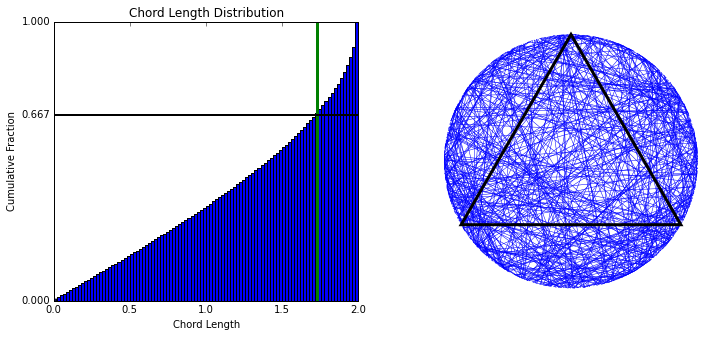

In [59]:
plot_length_distr_and_chords(lengths, R, solution_A_pct,
        triangle_edge_length, sol_A_coord_a, sol_A_coord_b, N)

## Solution B - The "random radius" method

The second method proceeds differently.
> "Choose a radius of the circle, choose a point on the radius and construct the chord through this point and perpendicular to the radius."

Selecting a radius of the circle is equivalent to selecting a random point $\phi \in [0, 2\pi)$. Moreover, selecting a random point on the radius is equivalent to selecting a random point $p \in [0, R)$. Given $\phi$ and $p$, it is straighforward to obtain the cartesian coordinates for the two endpoints $a$ and $b$ of the constructed chord.


In [61]:
phi = 2 * np.pi * np.random.rand(N) # choose random radius
point = R * np.random.rand(N) # choose random point on radius

absolute_angles = np.array([(np.arccos(p/R)) for p in point])

sol_B_coord_a = [(R*np.cos(theta), R*np.sin(theta)) for theta in phi + absolute_angles]
sol_B_coord_b = [(R*np.cos(theta), R*np.sin(theta)) for theta in phi - absolute_angles]

lengths = l2dist(sol_B_coord_a, sol_B_coord_b)

solution_B_pct = 100*sum(lengths > triangle_edge_length)/N

From simulation we find that {{"{0:.1f}%".format(solution_B_pct)}} of constructed chords are longer than the side of the triangle. The plots below show: (i) the distribution of lengths of the randomly drawn chords, (ii) some of the drawn chords.

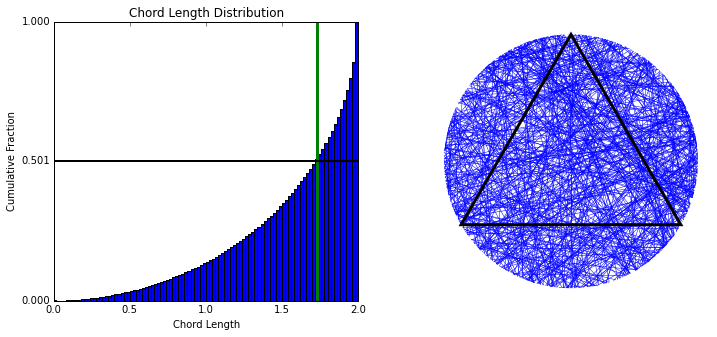

In [62]:
plot_length_distr_and_chords(lengths, R, solution_B_pct,
        triangle_edge_length, sol_B_coord_a, sol_B_coord_b, N)

## Solution C - The "random midpoint" method
We saw that the first method constructed chords by selecting random pairs of points from the circumference of the circle, while the second method selected random points from a radius of the circle. By contrast, this method proceeds by selecting random points from the *surface* within the circle (i.e., the chances that an area will incude one selected random point are proportional to its surface). Specifically, to follow this method,
> "Choose a point anywhere within the circle and construct a chord with the chosen point as its midpoint."

Suppose we have selected a midpoint with the aforementioned method; let $r$ be its distance from the centre $c = (0,0)$ of the circle, and $s=s(r)$ be the surface enclosed in the 'small' circle with center $c$ and radius $r$. 

Consider a newly drawn midpoint with distance $r'$ from center $c$. Observe that the probability that $r' < r$ is equal to $\pi r^2 / \pi R^2 = (r/R)^2$.

From the above observation, it is easy to see that selecting the midpoint is equivavalent to following these steps:

1. select a random point $p \in [0,1)$,
2. select the circle with center $c = (0,0)$ and radius $r = R * \sqrt{p}$,
3. select a random point $m$ from its circumference (equivalently, select random $\phi \in [0, 2\pi)$,
* use $m$ as the method's midpoint.

Given $r$ and $\phi$ associated with the selected midpoint, it easy to calculate the cartesian coordinate of the two endpoints $a$ and $b$ of the constructed chord.

In [63]:
R_sq = np.square(R)

# pick midpoint so that
# midpoints are picked uniformly at random
# across the area inside the circle
mid_radius = R * np.sqrt(np.random.rand(N))
mid_phi = 2 * np.pi * np.random.rand(N)

# the cartesian coordinates of midpoint
mid_x = [mid_radius[i] * np.cos(mid_phi[i]) for i in range(N)]
mid_y = [mid_radius[i] * np.sin(mid_phi[i]) for i in range(N)]

mid_y_square = np.square(mid_radius)

lengths = 2 * np.sqrt(R_sq - mid_y_square)

angle_a = mid_phi + np.arccos(mid_radius/R) # angle of first endpoint
angle_b = mid_phi - np.arccos(mid_radius/R) # angle of second endpoit

x_of_a = R*np.cos(angle_a) 
y_of_a = R*np.sin(angle_a) 
sol_C_coord_a = list(zip(x_of_a, y_of_a))

x_of_b = R*np.cos(angle_b)
y_of_b = R*np.sin(angle_b)
sol_C_coord_b = list(zip(x_of_b, y_of_b))

solution_C_pct = 100*sum(lengths > triangle_edge_length)/N

Simulation shows that {{"{0:.1f}%".format(solution_C_pct)}} of generated chords are longer than the side of the inscribed triangle. The plots below show (i) the distribution of the lengths of constructed chords, and (ii) a sample of the constructed chords.

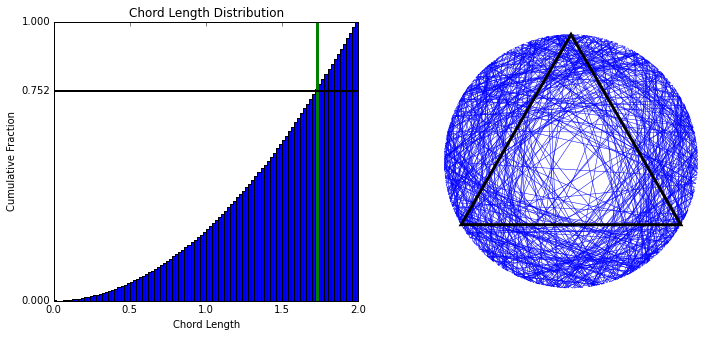

In [64]:
plot_length_distr_and_chords(lengths, R, solution_C_pct,
        triangle_edge_length, sol_C_coord_a, sol_C_coord_b, N)

## What solution to adopt?

Explain.

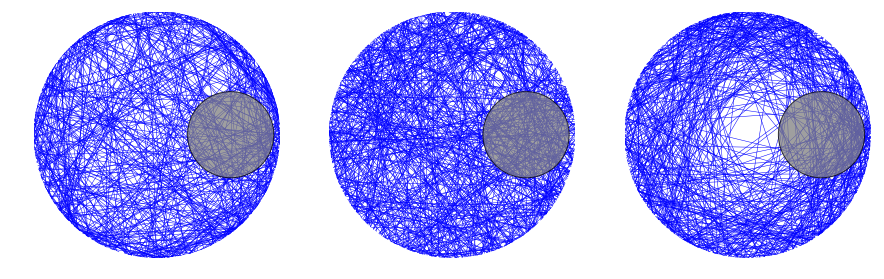

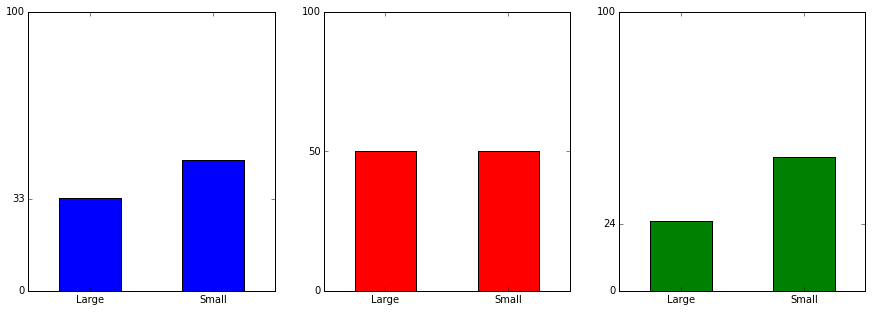

In [135]:
# small circle
r = 0.35 # radius
c = np.array([0.6, 0.0]) # center

# solution A
sol_A_small_lengths = get_small_lengths(c, r, sol_A_coord_a, sol_A_coord_b)
sol_B_small_lengths = get_small_lengths(c, r, sol_B_coord_a, sol_B_coord_b)
sol_C_small_lengths = get_small_lengths(c, r, sol_C_coord_a, sol_C_coord_b)

small_triangle_edge_length = get_triangle_side_length(r)

sol_A_small_pct = 100 * sum(sol_A_small_lengths > small_triangle_edge_length) / len(sol_A_small_lengths)
sol_B_small_pct = 100 * sum(sol_B_small_lengths > small_triangle_edge_length) / len(sol_B_small_lengths)
sol_C_small_pct = 100 * sum(sol_C_small_lengths > small_triangle_edge_length) / len(sol_C_small_lengths)


# plot
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

chords_A = [patches.PathPatch(patches.Path([sol_A_coord_a[i], sol_A_coord_b[i]],
            [patches.Path.MOVETO, patches.Path.LINETO]), edgecolor = "blue",
            lw = 0.5, fill = False) for i in range(M)]
ax[0].set(xlim = (-R, R), ylim = (-R, R), aspect = 1.)
for chord in chords_A:
    _tmp = ax[0].add_patch(chord)
circle = patches.Circle(c, r, ec = 'black', fc = "grey", alpha = 0.75)
ax[0].add_patch(circle)
_tmp = ax[0].axis('off')


chords_B = [patches.PathPatch(patches.Path([sol_B_coord_a[i], sol_B_coord_b[i]],
            [patches.Path.MOVETO, patches.Path.LINETO]), edgecolor = "blue",
            lw = 0.5, fill = False) for i in range(M)]
ax[1].set(xlim = (-R, R), ylim = (-R, R), aspect = 1.)
for chord in chords_B:
    _tmp = ax[1].add_patch(chord)
circle = patches.Circle(c, r, ec = 'black', fc = "grey", alpha = 0.75)
ax[1].add_patch(circle)
_tmp = ax[1].axis('off')

chords_C = [patches.PathPatch(patches.Path([sol_C_coord_a[i], sol_C_coord_b[i]],
            [patches.Path.MOVETO, patches.Path.LINETO]), edgecolor = "blue",
            lw = 0.5, fill = False) for i in range(M)]
ax[2].set(xlim = (-R, R), ylim = (-R, R), aspect = 1.)
for chord in chords_C:
    _tmp = ax[2].add_patch(chord)
circle = patches.Circle(c, r, ec = 'black', fc = "grey", alpha = 0.75)
ax[2].add_patch(circle)
_tmp = ax[2].axis('off')


fig, ax = plt.subplots(1, 3, figsize = (15, 5))

_tmp = ax[0].set(xlim = (-0.5, 1.5), ylim = (0,100), xticks = [0, 1],
                 xticklabels = ['Large', 'Small'],
                 yticks = [0, int(solution_A_pct), 100])
_tmp = ax[0].bar([0, 1], [solution_A_pct, sol_A_small_pct], width = 0.5,
                align = 'center', color = "blue")

_tmp = ax[1].set(xlim = (-0.5, 1.5), ylim = (0,100), xticks = [0, 1],
                 xticklabels = ['Large', 'Small'], 
                 yticks = [0, int(solution_B_pct), 100])
_tmp = ax[1].bar([0, 1], [solution_B_pct, sol_B_small_pct], width = 0.5,
                align = 'center', color = "red")
                 
_tmp = ax[2].set(xlim = (-0.5, 1.5), ylim = (0,100), xticks = [0, 1],
                 xticklabels = ['Large', 'Small'], 
                 yticks = [0, int(solution_C_pct), 100])
_tmp = ax[2].bar([0, 1], [solution_C_pct, sol_C_small_pct], width = 0.5,
                align = 'center', color = "green")